In [52]:
# execute this cell before you start

import tensorflow as tf
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.VERSION)
print(tf.keras.__version__)


1.12.0
2.1.6-tf


#  CA4
## due on 02/04/2019

to submit the assignment, please do the following:

- do `Cell -> All output -> Clear` to clear all your output
- save the notebook (CA3.ipynb)

# The Boston Housing Data

Consider the data in  `keras.datasets.boston_housing`. In this case, there are only about 400 training datasets, where each dataset consists of 13 input values which are characteristic for a given property. The output corresponds to the property price. The meaning of the various columns is explained in https://www.kaggle.com/c/boston-housing.

In contrast to the previous examples, which were categorisation problems, this is now a regression problem. The challenge is to train a network, which is able to predict the price of the property. 

You will again find lots of examples on the internet, and it is okay to use inspiration as long as you provide the source. 

Adhere to the following rules:

a) Train the network on the logarithm of the price, not on the price itself. Explain why this makes sense. 

b) You will find many examples, which use `sci-kit learn` or other packages, which we did not do in the course. Do not use them, and restrict yourself to methods and libraries which we covered

c) Try to find a network, which has the smallest amount of trainable parameters, while still providing good predictions of the price.  Discuss, how small you can go. 

d) Once you have trained the network, explore the correlations which this network predicts:
    - Which inputs have a positive price correlation? 
    - Which inputs have a negative price correlation? 
    - Which inputs have little/no influence on the price?
    
  Investigate this by feeding into the network some artificial data, which you obtain from the testing data by varying one of the input columns.
  
  
Optional challenge (no extra points but extra insight!):

Compare the results with standard regression methods, for example as in ST4060/ST4061 in case you have covered them. 



In [53]:
(train_x, train_y), (test_x, test_y) = keras.datasets.boston_housing.load_data()

# from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
var_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
             'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV']

In [54]:
# plt.scatter(range(1, len(train_y) + 1), train_y)

In [55]:
# log_train_y = np.log(train_y)
# log_test_y = np.log(test_y)

Method to print first n entries in the training data

In [56]:
def printFirstN(n, x=train_x, y=train_y):
    print(("{:8}"*len(var_names)).format(*var_names))
    for i in range(10):
        print(("{:<8.4}"*len(x[i])).format(*x[i]),
         "{:<8.3}".format(y[i]))

In [57]:
#Explore the data
print('Train X shape', train_x.shape)
print('Train Y shape', train_y.shape)
print('Test X shape', test_x.shape)
print('Train Y shape', test_y.shape)
print()

#inspect a few elements to get an idea of the data

printFirstN(10)

    

Train X shape (404, 13)
Train Y shape (404,)
Test X shape (102, 13)
Train Y shape (102,)

CRIM    ZN      INDUS   CHAS    NOX     RM      AGE     DIS     RAD     TAX     PTRATIO BLACK   LSTAT   MEDV    
1.232   0.0     8.14    0.0     0.538   6.142   91.7    3.977   4.0     307.0   21.0    396.9   18.72    15.2    
0.02177 82.5    2.03    0.0     0.415   7.61    15.7    6.27    2.0     348.0   14.7    395.4   3.11     42.3    
4.898   0.0     18.1    0.0     0.631   4.97    100.0   1.333   24.0    666.0   20.2    375.5   3.26     50.0    
0.03961 0.0     5.19    0.0     0.515   6.037   34.5    5.985   5.0     224.0   20.2    396.9   8.01     21.1    
3.693   0.0     18.1    0.0     0.713   6.376   88.4    2.567   24.0    666.0   20.2    391.4   14.65    17.7    
0.2839  0.0     7.38    0.0     0.493   5.708   74.3    4.721   5.0     287.0   19.6    391.1   11.74    18.5    
9.187   0.0     18.1    0.0     0.7     5.536   100.0   1.58    24.0    666.0   20.2    396.9   23.6     11.3    

It looks like the values of each predictor are very different in scale when compared to each other.
This may lead to difficulties in building a good enough model.
Hence scale them uniformly.

In [58]:
# train_x = (train_x - train_x.min(axis=0)) / (train_x.max(axis=0) - train_x.min(axis=0))
# test_x = (test_x - test_x.min(axis=0)) / (test_x.max(axis=0) - test_x.min(axis=0))

In [59]:
# Scaling criteria from https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras
mean = train_x.mean(axis=0)
train_x = train_x - mean
std = train_x.std(axis=0)
train_x = train_x/std

test_x = test_x-mean
test_x = test_x/std

In [60]:
printFirstN(10)

CRIM    ZN      INDUS   CHAS    NOX     RM      AGE     DIS     RAD     TAX     PTRATIO BLACK   LSTAT   MEDV    
1.232   0.0     8.14    0.0     0.538   6.142   91.7    3.977   4.0     307.0   21.0    396.9   18.72    15.2    
0.02177 82.5    2.03    0.0     0.415   7.61    15.7    6.27    2.0     348.0   14.7    395.4   3.11     42.3    
4.898   0.0     18.1    0.0     0.631   4.97    100.0   1.333   24.0    666.0   20.2    375.5   3.26     50.0    
0.03961 0.0     5.19    0.0     0.515   6.037   34.5    5.985   5.0     224.0   20.2    396.9   8.01     21.1    
3.693   0.0     18.1    0.0     0.713   6.376   88.4    2.567   24.0    666.0   20.2    391.4   14.65    17.7    
0.2839  0.0     7.38    0.0     0.493   5.708   74.3    4.721   5.0     287.0   19.6    391.1   11.74    18.5    
9.187   0.0     18.1    0.0     0.7     5.536   100.0   1.58    24.0    666.0   20.2    396.9   23.6     11.3    
4.097   0.0     19.58   0.0     0.871   5.468   100.0   1.412   5.0     403.0   14.7    3

In [61]:
%%time

model = keras.models.Sequential()
model.add(keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(train_x.shape[1],)))
model.add(keras.layers.Dense(512, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

fit_result = model.fit(train_x, train_y, epochs=100, batch_size=1, validation_data=(test_x, test_y))


Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 2s 4ms/step - loss: 59.5747 - mean_absolute_error: 4.8199 - val_loss: 29.5069 - val_mean_absolute_error: 3.9844
Epoch 2/100
404/404 [==============================] - 2s 4ms/step - loss: 17.0931 - mean_absolute_error: 3.0059 - val_loss: 25.7310 - val_mean_absolute_error: 3.3710
Epoch 3/100
404/404 [==============================] - 2s 4ms/step - loss: 13.9648 - mean_absolute_error: 2.8875 - val_loss: 26.6897 - val_mean_absolute_error: 3.7107
Epoch 4/100
404/404 [==============================] - 2s 4ms/step - loss: 14.7564 - mean_absolute_error: 2.8241 - val_loss: 20.5252 - val_mean_absolute_error: 3.1368
Epoch 5/100
404/404 [==============================] - 2s 4ms/step - loss: 12.7524 - mean_absolute_error: 2.6730 - val_loss: 23.1371 - val_mean_absolute_error: 3.5401
Epoch 6/100
404/404 [==============================] - 2s 4ms/step - loss: 12.8825 - mean_absolute_error: 2.6835 - val_

Epoch 50/100
404/404 [==============================] - 3s 8ms/step - loss: 4.4193 - mean_absolute_error: 1.6242 - val_loss: 16.1845 - val_mean_absolute_error: 2.7746
Epoch 51/100
404/404 [==============================] - 2s 5ms/step - loss: 5.2183 - mean_absolute_error: 1.7205 - val_loss: 14.6427 - val_mean_absolute_error: 2.5213
Epoch 52/100
404/404 [==============================] - 2s 5ms/step - loss: 3.7282 - mean_absolute_error: 1.5180 - val_loss: 14.1392 - val_mean_absolute_error: 2.3866
Epoch 53/100
404/404 [==============================] - 2s 5ms/step - loss: 5.2375 - mean_absolute_error: 1.6694 - val_loss: 17.0006 - val_mean_absolute_error: 3.0897
Epoch 54/100
404/404 [==============================] - 2s 6ms/step - loss: 5.9294 - mean_absolute_error: 1.6332 - val_loss: 15.4208 - val_mean_absolute_error: 2.5785
Epoch 55/100
404/404 [==============================] - 2s 4ms/step - loss: 3.4465 - mean_absolute_error: 1.4163 - val_loss: 14.2988 - val_mean_absolute_error: 2.382

404/404 [==============================] - 2s 5ms/step - loss: 2.0067 - mean_absolute_error: 1.0568 - val_loss: 13.7487 - val_mean_absolute_error: 2.4641
Epoch 100/100
404/404 [==============================] - 2s 5ms/step - loss: 3.2276 - mean_absolute_error: 1.3304 - val_loss: 11.0105 - val_mean_absolute_error: 2.2949
CPU times: user 11min 54s, sys: 1min 48s, total: 13min 43s
Wall time: 3min 30s


In [62]:
history = fit_result.history

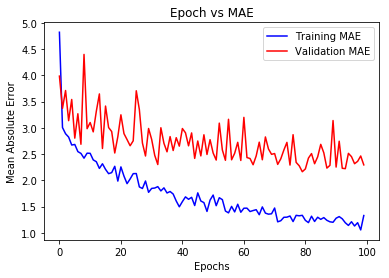

In [63]:
plt.plot(fit_result.epoch, history['mean_absolute_error'], 'b', label='Training MAE')
plt.plot(fit_result.epoch, history['val_mean_absolute_error'], 'r', label='Validation MAE')
plt.title('Epoch vs MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

The plot says that although the training MAE goes down almost monotonously, the test MAE remains more or less the same after about 60 epochs. This hints that the model has been overfitted. 
This is confirmed by the Epochs vs Loss plot below:

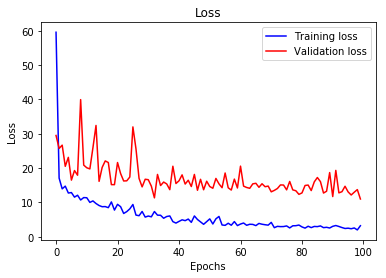

In [64]:
plt.plot(fit_result.epoch, history['loss'], 'b', label='Training loss')
plt.plot(fit_result.epoch, history['val_loss'], 'r', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

d) Once you have trained the network, explore the correlations which this network predicts:

In [71]:
print(range(10))

0
1
2
3
4
5
6
7
8
9


In [36]:

print(model.predict(np.reshape(test_x[0], (1,test_x[0].shape[0]))))
print(test_y[0])

[[7.8296323]]
7.2


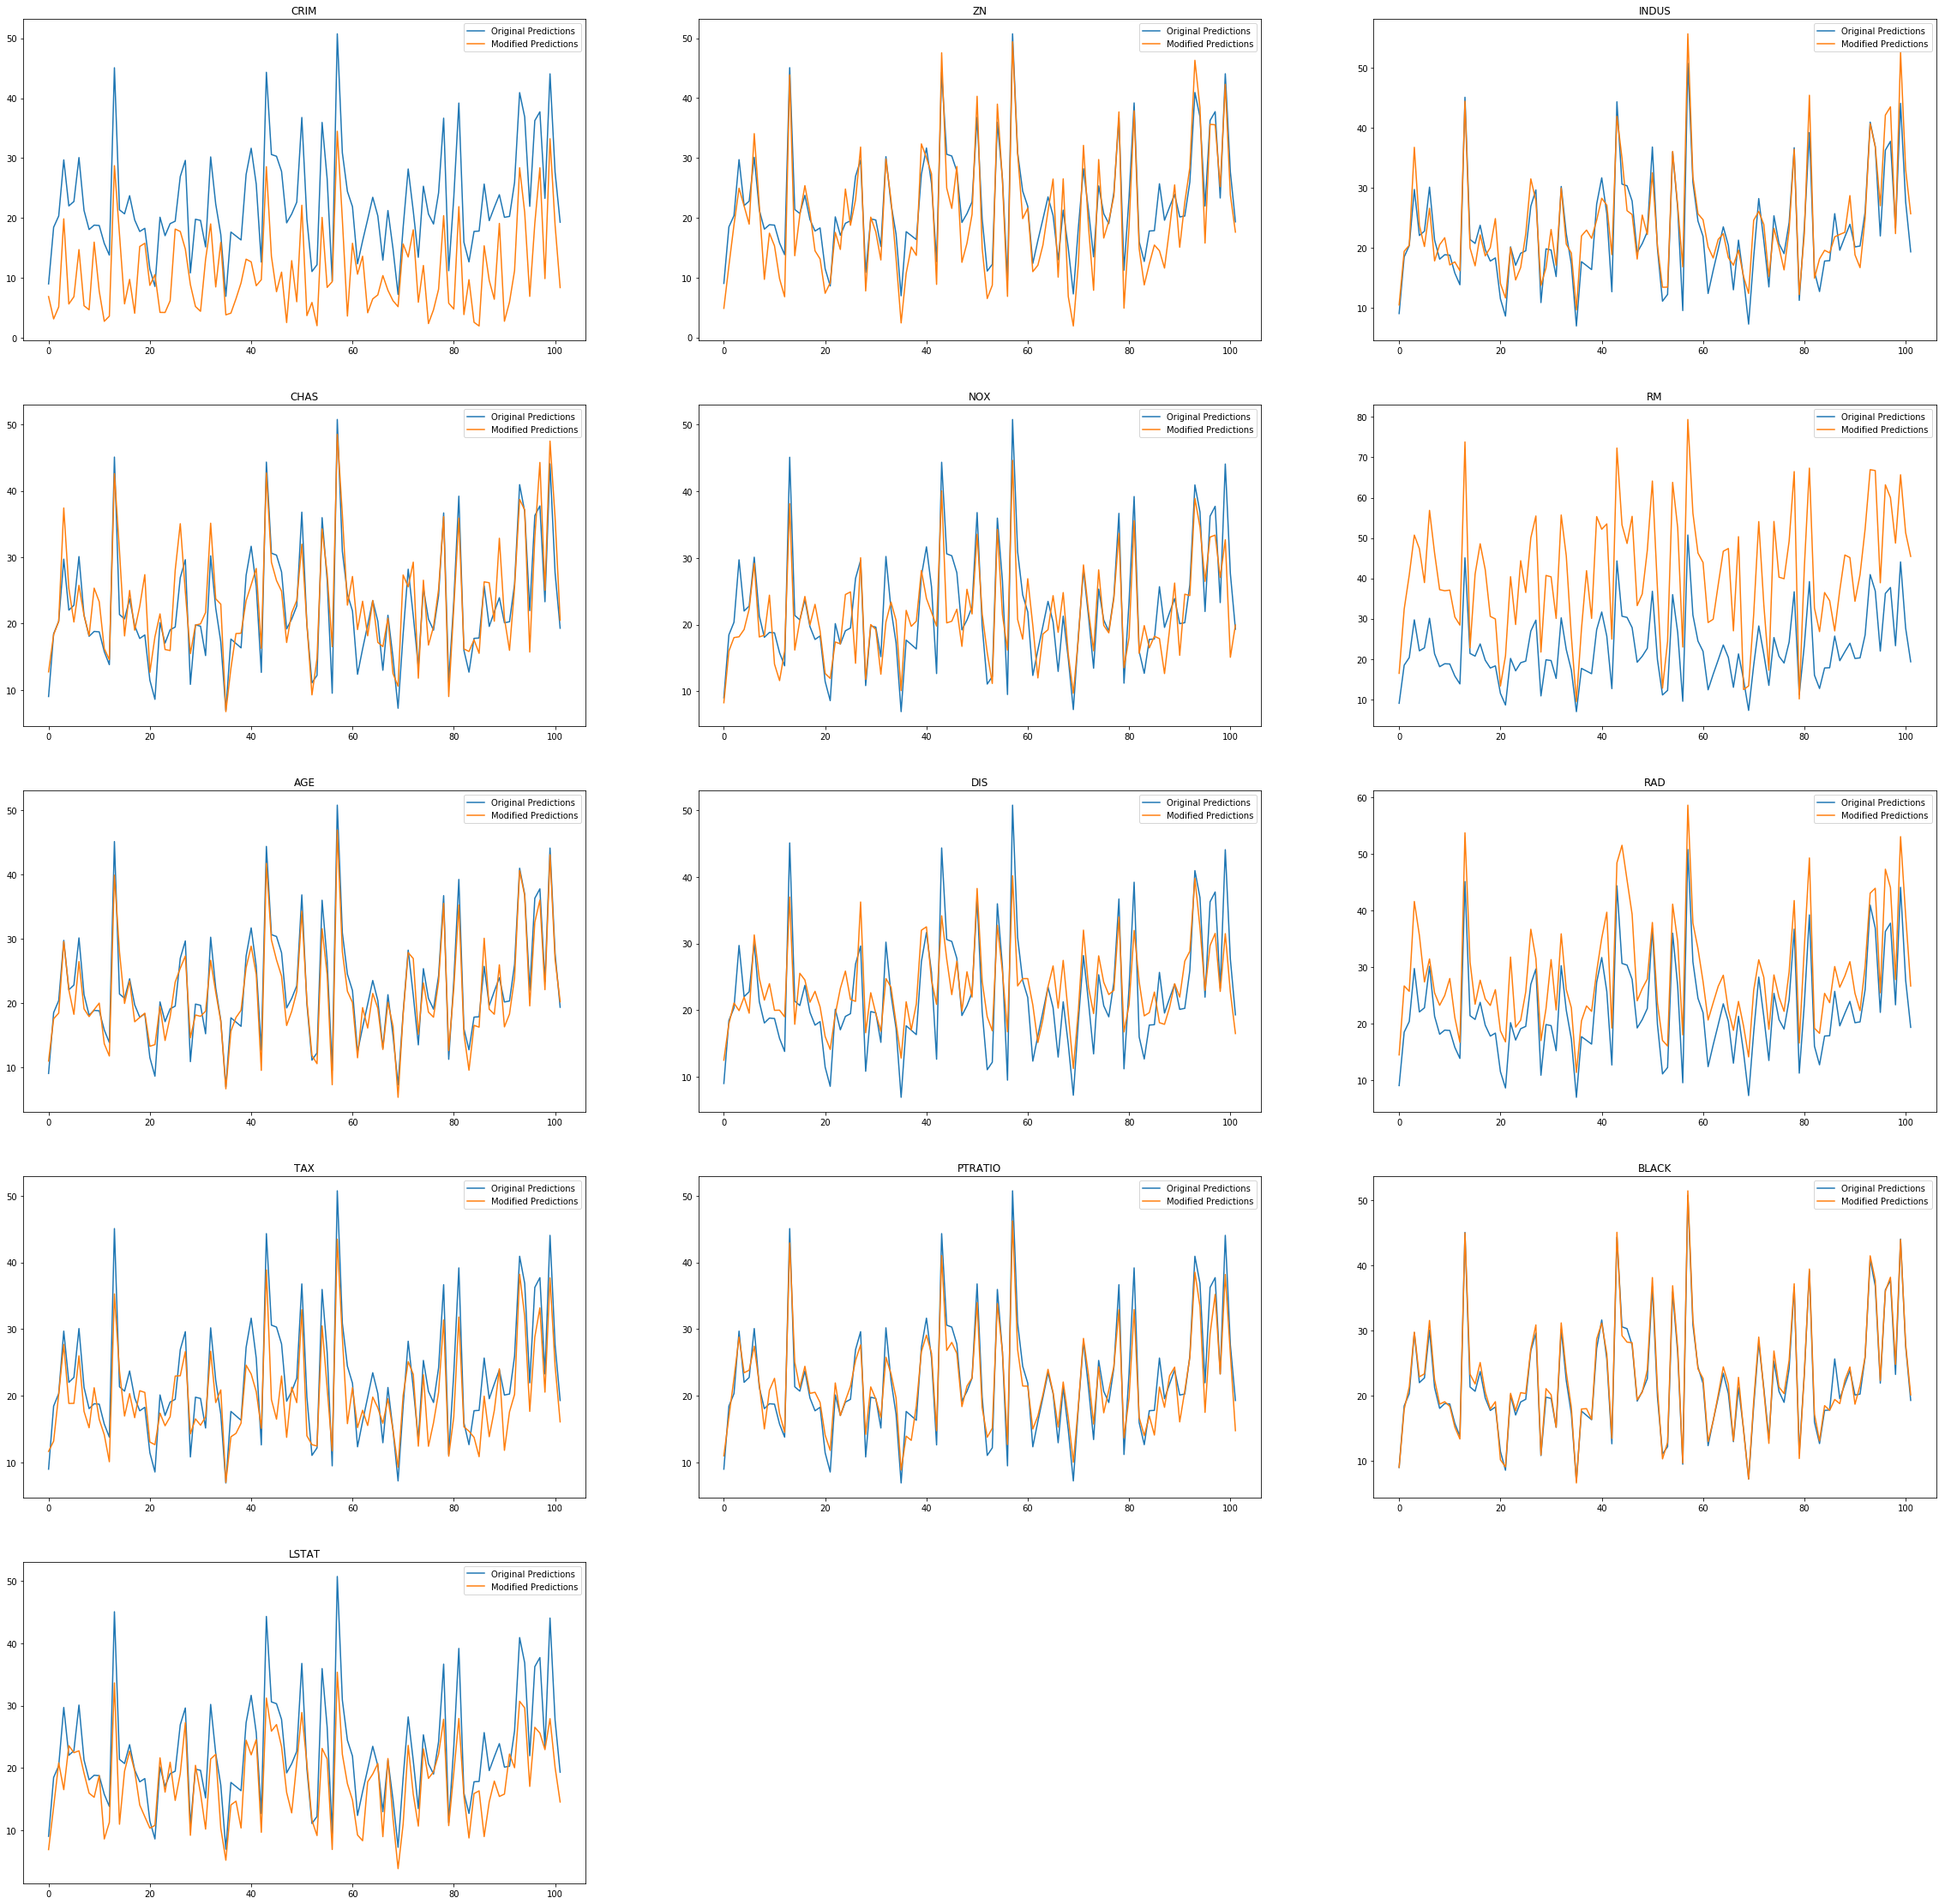

In [85]:
original_predictions = model.predict(test_x)
new_predictions = [];
for j in range(len(var_names) - 1):
    # Make a copy of the original so that its column can be modified
    test_x_copy = np.copy(test_x)
    
    # change each column by a measure delta
    for i in range(len(test_x)):
        #delta = (test_x.max(axis=0)[j] - test_x[i][j]) * 0.75;
        #test_x_copy[i][j] += delta;  
        test_x_copy[i][j] += test_x.max(axis=0)[j];  
        
    # Now make the prediction again with the modified data
    new_prediction = model.predict(test_x_copy)
    new_predictions.append(new_prediction)
    
num_predictions = len(original_predictions)

plt.figure(figsize=(40,40))
for i in range(13):
    plt.subplot(5,3, i + 1)
    x = list(range(num_predictions))
    plt.plot(x, original_predictions, label='Original Predictions')
    plt.plot(x, new_predictions[i], label='Modified Predictions')
    plt.title(var_names[i])
    plt.legend()

In [73]:
print()

array([14])

In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
